This notebook shows the comparison between measured line widths and AWSoM-R synthetic line widths. 
Links to [Figure 11](#figure11) (EIS instrumental widths from SolarSoft) and [Figure 13](#figure13) (EIS instrumental widths cross-calibrated with SUMER). 

(The internal hyperlink only works on [nbviewer](https://nbviewer.org). Do not click when viewing the notebook on GitHub.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const
import pandas as pd
import cmcrameri as cmcm
from matplotlib import rcParams
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage[T1]{fontenc} \usepackage{amsmath} \usepackage{color}'
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = "Computer Modern Roman"
rcParams['axes.linewidth'] = 2
rcParams['xtick.major.width'] = 1.2
rcParams['xtick.major.size'] = 10
rcParams['xtick.minor.width'] = 1.2
rcParams['xtick.minor.size'] = 6
rcParams['ytick.major.width'] = 1.2
rcParams['ytick.major.size'] = 8
rcParams['ytick.minor.width'] = 1.2
rcParams['ytick.minor.size'] = 6 

In [2]:
c = const.c.cgs.value/1.e5
amu = const.u.cgs.value
k_B = const.k_B.cgs.value
hplanck = const.h.cgs.value

In [3]:
df_eis = pd.read_excel("../../save/eis_line_list_final_v2.xlsx",sheet_name="awsom_compare")
df_eis["ion"] = df_eis["ion"].str.strip()
df_eis["charge_stat"] = df_eis["charge_stat"].str.strip()
df_eis["quality"] = df_eis["quality"].str.strip()
df_eis["fwhm_true_err"] = df_eis["fwhm_fit"]/df_eis["fwhm_true"]*df_eis["fwhm_err"]
df_eis["Z/A"] = df_eis["Z"]/df_eis["A"]
df_eis = df_eis.sort_values(["Z/A","wvl_chianti"])
df_eis = df_eis.reset_index(drop=True)
df_eis

,ion,charge_stat,Z,A,temp,wvl_fit,wvl_chianti,fwhm_fit,fwhm_err,fwhm_true,fwhm_awsom_fit,fwhm_awsom_err,fwhm_awsom_true,quality,desc,fwhm_true_cross,fwhm_true_err,Z/A
0,Fe,viii,7,55.8500,5.8,185.209,185.213,0.07648,0.00045,0.0314,0.080552,0.000008,0.039858,a,NaN,0.044150,0.001096,0.125336
1,Fe,viii,7,55.8500,5.8,186.600,186.598,0.07979,0.00071,0.0388,0.080878,0.000030,0.040446,a,NaN,0.049663,0.001460,0.125336
2,Fe,viii,7,55.8500,5.8,194.656,194.661,0.07716,0.00049,0.0331,0.085091,0.000053,0.048378,b,NaN,0.045317,0.001142,0.125336
3,Fe,viii,7,55.8500,5.8,253.947,253.956,0.07980,0.00280,0.0396,0.088650,0.000150,0.054402,a,Si X at blue wing,0.049679,0.005642,0.125336
4,Mn,viii,7,54.9380,5.8,185.449,185.463,0.08280,0.00390,0.0447,0.080460,0.000190,0.039677,b,bl with Fe VII,0.054368,0.007224,0.127416
5,Fe,ix,8,55.8500,5.8,191.209,191.206,0.07710,0.00180,0.0331,0.081250,0.000210,0.041242,a,NaN,0.045215,0.004193,0.143241
6,Fe,ix,8,55.8500,5.8,197.856,197.854,0.08085,0.00035,0.0410,0.082188,0.000013,0.043069,a,NaN,0.051349,0.000690,0.143241
7,Fe,x,9,55.8500,5.9,174.521,174.531,0.07940,0.00150,0.0380,0.798940,0.000014,0.038511,a,NaN,0.049034,0.003134,0.161146
8,Fe,x,9,55.8500,5.9,177.230,177.240,0.08077,0.00064,0.0407,0.080154,0.000040,0.039047,a,NaN,0.051223,0.001270,0.161146
9,Fe,x,9,55.8500,5.9,184.533,184.537,0.07900,0.00026,0.0371,0.080810,0.000280,0.040385,a,NaN,0.048384,0.000554,0.161146


In [4]:
df_sumer = pd.read_excel("../../save/sumer_line_list_final_v2.xlsx",sheet_name="awsomr_compare")
df_sumer = df_sumer[df_sumer["quality"] != "c"]
df_sumer["ion"] = df_sumer["ion"].str.strip()
df_sumer["charge_stat"] = df_sumer["charge_stat"].str.strip()
df_sumer["quality"] = df_sumer["quality"].str.strip()
df_sumer["fwhm_true_err"] = df_sumer["fwhm_fit"]/df_sumer["fwhm_true"]*df_sumer["fwhm_err"]
df_sumer["Z/A"] = df_sumer["Z"]/df_sumer["A"]
df_sumer = df_sumer.sort_values(["Z/A","wvl_chianti"])
df_sumer = df_sumer.reset_index(drop=True)
df_sumer

,ion,charge_stat,Z,A,temp,wvl_fit,wvl_chianti,fwhm_fit,fwhm_err,fwhm_true,fwhm_awsom,fwhm_awsom_err,quality,fwhm_true_err,Z/A
0,Fe,viii,7,55.85000,5.8,697.155,697.156,0.2810,0.0200,0.19422,0.150429,0.000050,a,0.028936,0.125336
1,Fe,x,9,55.85000,5.9,1028.040,1028.053,0.3550,0.0110,0.30064,0.227870,0.000220,a,0.012989,0.161146
2,Ar,viii,7,39.94800,5.7,713.784,713.801,0.2820,0.0140,0.19659,0.162230,0.000059,a,0.020082,0.175228
3,Fe,xi,10,55.85000,6.0,1028.990,1028.955,0.3220,0.0300,0.26040,0.233480,0.000450,a,0.037097,0.179051
4,Si,vii,6,28.08550,5.8,1049.280,1049.153,0.3520,0.0190,0.29595,0.246160,0.000120,a,0.022598,0.213633
5,Al,vii,6,26.98154,5.8,1053.860,1053.996,0.3070,0.0330,0.24387,0.248345,0.000048,a,0.041543,0.222374
6,S,x,9,32.06000,6.0,776.242,776.373,0.3580,0.0540,0.29914,0.191230,0.000380,a,0.064625,0.280724
7,Si,ix,8,28.08550,5.9,694.738,694.686,0.2490,0.0130,0.14180,0.167270,0.000130,a,0.022828,0.284844
8,Mg,viii,7,24.31000,5.9,689.629,689.641,0.2760,0.0180,0.18696,0.165891,0.000041,a,0.026573,0.287947
9,Mg,viii,7,24.31000,5.8,762.647,762.660,0.2580,0.0240,0.16264,0.183517,0.000033,a,0.038072,0.287947


In [5]:
df_eis_ion = df_eis[["ion","charge_stat","Z","A","Z/A"]]
df_eis_ion = df_eis_ion.drop_duplicates()
df_sumer_ion = df_sumer[["ion","charge_stat","Z","A","Z/A"]]
df_sumer_ion = df_sumer_ion.drop_duplicates()
df_ion = pd.concat([df_eis_ion,df_sumer_ion],ignore_index=True)
df_ion = df_ion.drop_duplicates().sort_values("Z/A")

### Figure 11
<a id='figure11'></a>

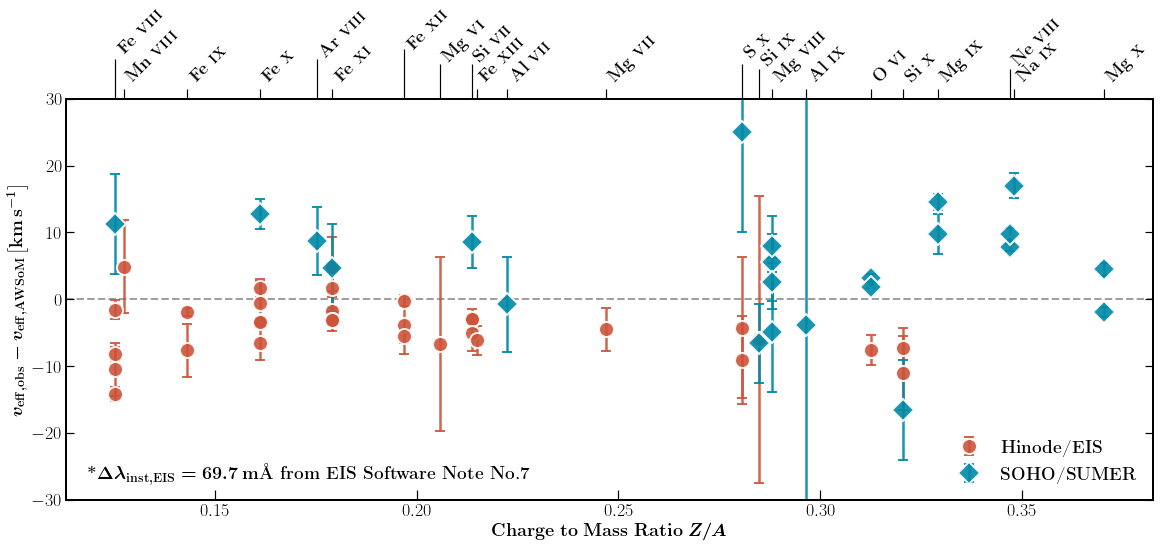

In [6]:
fig, ax = plt.subplots(figsize=(16,7.5),constrained_layout=True)

eis_veff = df_eis["fwhm_true"]/df_eis["wvl_chianti"]*c/np.sqrt(4*np.log(2))

awsom_eis_veff = df_eis["fwhm_awsom_true"]/df_eis["wvl_chianti"]*c/np.sqrt(4*np.log(2))

eis_veff_err = df_eis["fwhm_true_err"]/df_eis["wvl_chianti"]*c/np.sqrt(4*np.log(2))

sumer_veff = df_sumer["fwhm_true"]/df_sumer["wvl_chianti"]*c/np.sqrt(4*np.log(2))

awsom_sumer_veff = df_sumer["fwhm_awsom"]/df_sumer["wvl_chianti"]*c/np.sqrt(4*np.log(2))

sumer_veff_err = df_sumer["fwhm_true_err"]/df_sumer["wvl_chianti"]*c/np.sqrt(4*np.log(2))


ion_name = r"\textbf{" + df_ion["ion"] + r" \textsc{"+ df_ion["charge_stat"] + r"}}"

ax.errorbar(df_eis["Z/A"],eis_veff-awsom_eis_veff,eis_veff_err,color="#CC543A",ls="none",marker="o",
            markersize=15,capsize=5,lw=2.5,label=r"\textbf{Hinode/EIS}",zorder=15,markeredgecolor='white',
            markeredgewidth=2,alpha=0.9,capthick=2.5)

ax.errorbar(df_sumer["Z/A"],sumer_veff-awsom_sumer_veff,sumer_veff_err,color="#0089A7",ls="none",marker="D",
            markersize=15,capsize=5,lw=2.5,label=r"\textbf{SOHO/SUMER}",zorder=15,markeredgecolor='white',
            markeredgewidth=2,alpha=0.9,capthick=2.5)

ax_ion = ax.twiny()
ax_ion.set_xlim(ax.get_xlim())
ax_ion.set_xticks(df_ion["Z/A"].values)
ax_ion.set_xticklabels(ion_name,rotation=45,ha="left")
ax_ion.tick_params(labelsize=18)

tick_len_index = [1,9,13,15,17,25,27,39]
tick_len = [40,40,50,35,35,35,30,30]
label_index = [0,4,6,7,8,12,13,19]
label_pos = [1.07,1.06,1.08,1.05,1.05,1.06,1.04,1.04]
ax_ion_major_ticks = ax_ion.get_xticklines()
ax_ion_major_labels = ax_ion.get_xmajorticklabels()
for tick_len_index_, tick_len_, label_index_, label_pos_ in zip(tick_len_index, tick_len, label_index, label_pos):
    ax_ion_major_ticks[tick_len_index_].set_markersize(tick_len_)
    ax_ion_major_labels[label_index_].set_y(label_pos_)

ax.legend(loc="lower right",fontsize=18,frameon=False)   
ax.text(0.02,0.05,r"\textbf{*}$\boldsymbol{\Delta \lambda_{\rm inst, EIS} = 69.7\,\mathrm{m}}$\textbf{\mbox{\AA} from EIS Software Note No.7}",
fontsize=18,transform=ax.transAxes)
ax.set_ylim((-30,30))
ax.axhline(0,color="#787878",lw=2,ls="--",alpha=0.7,zorder=0)
ax.tick_params(labelsize=18,direction="in",which="both",right=True,top=False)
ax.set_ylabel(r"$\boldsymbol{v_{\rm eff,obs} - v_{\rm eff,AWSoM}\, \mathrm{\left[km\, s^{-1}\right]}}$",fontsize=18)
ax.set_xlabel(r"$\boldsymbol{\mathrm{Charge\ to\ Mass\ Ratio}\ Z/A}$",fontsize=18)
#ax.set_title(r"\textbf{EIS Instrumental Broadening from EIS Software Note No.7}",fontsize=18)
plt.savefig(fname="../../figs/ms/AWSoM_obs_comp.pdf",format="pdf",dpi=300)

### Figure 13
<a id='figure13'></a>

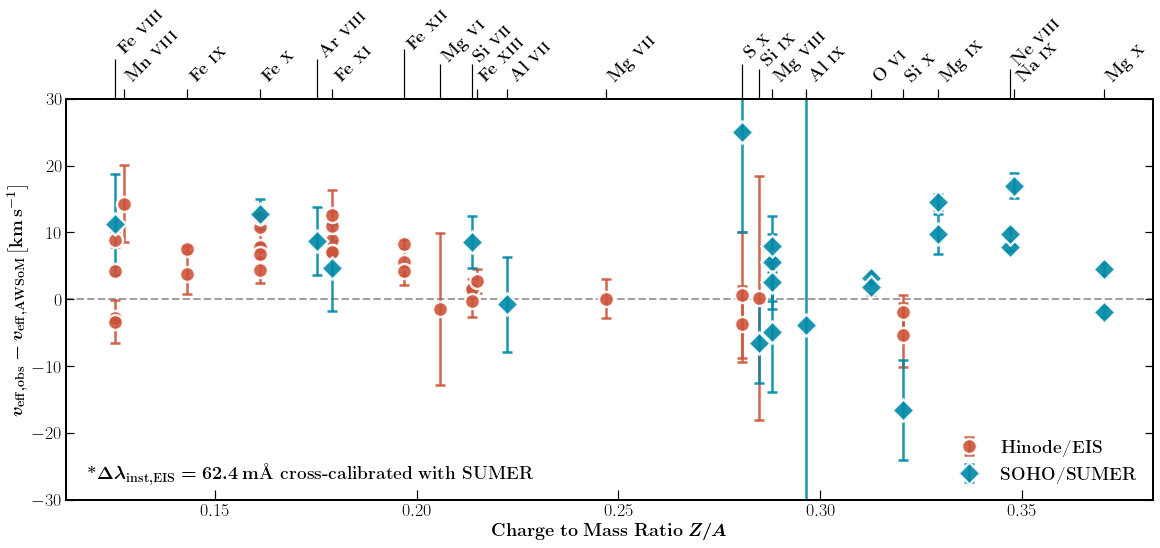

In [7]:
fig, ax = plt.subplots(figsize=(16,7.5),constrained_layout=True)

eis_veff_cross = df_eis["fwhm_true_cross"]/df_eis["wvl_chianti"]*c/np.sqrt(4*np.log(2))

eis_veff_err_cross = df_eis["fwhm_err"]*df_eis["fwhm_fit"] \
                /df_eis["fwhm_true_cross"]/df_eis["wvl_chianti"]*c/np.sqrt(4*np.log(2))

ion_name = r"\textbf{" + df_ion["ion"] + r" \textsc{"+ df_ion["charge_stat"] + r"}}"

ax.errorbar(df_eis["Z/A"],eis_veff_cross-awsom_eis_veff,eis_veff_err_cross,color="#CC543A",ls="none",marker="o",
            markersize=15,capsize=5,lw=2.5,label=r"\textbf{Hinode/EIS}",zorder=15,markeredgecolor='white',
            markeredgewidth=2.5,alpha=0.9,capthick=2.5)

ax.errorbar(df_sumer["Z/A"],sumer_veff-awsom_sumer_veff,sumer_veff_err,color="#0089A7",ls="none",marker="D",
            markersize=15,capsize=5,lw=2.5,label=r"\textbf{SOHO/SUMER}",zorder=15,markeredgecolor='white',
            markeredgewidth=2.5,alpha=0.9,capthick=2.5)

ax_ion = ax.twiny()
ax_ion.set_xlim(ax.get_xlim())
ax_ion.set_xticks(df_ion["Z/A"].values)
ax_ion.set_xticklabels(ion_name,rotation=45,ha="left")
ax_ion.tick_params(labelsize=18)

tick_len_index = [1,9,13,15,17,25,27,39]
tick_len = [40,40,50,35,35,35,30,30]
label_index = [0,4,6,7,8,12,13,19]
label_pos = [1.07,1.06,1.08,1.05,1.05,1.06,1.04,1.04]
ax_ion_major_ticks = ax_ion.get_xticklines()
ax_ion_major_labels = ax_ion.get_xmajorticklabels()
for tick_len_index_, tick_len_, label_index_, label_pos_ in zip(tick_len_index, tick_len, label_index, label_pos):
    ax_ion_major_ticks[tick_len_index_].set_markersize(tick_len_)
    ax_ion_major_labels[label_index_].set_y(label_pos_)

ax.legend(loc="lower right",fontsize=18,frameon=False)   
ax.text(0.02,0.05,r"\textbf{*}$\boldsymbol{\Delta \lambda_{\rm inst, EIS} = 62.4\,\mathrm{m}}$\textbf{\mbox{\AA} cross-calibrated with SUMER}",
fontsize=18,transform=ax.transAxes)
ax.set_ylim((-30,30))
ax.axhline(0,color="#787878",lw=2,ls="--",alpha=0.7,zorder=0)
ax.tick_params(labelsize=18,direction="in",which="both",right=True,top=False)
ax.set_ylabel(r"$\boldsymbol{v_{\rm eff,obs} - v_{\rm eff,AWSoM}\, \mathrm{\left[km\, s^{-1}\right]}}$",fontsize=18)
ax.set_xlabel(r"$\boldsymbol{\mathrm{Charge\ to\ Mass\ Ratio}\ Z/A}$",fontsize=18)
plt.savefig(fname="../../figs/ms/AWSoM_obs_comp_cross.pdf",format="pdf",dpi=300)
#ax.set_title(r"\textbf{EIS Instrumental Broadening from EIS Software Note No.7}",fontsize=18)
